In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [4]:
df=pd.read_csv("heart.csv")
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

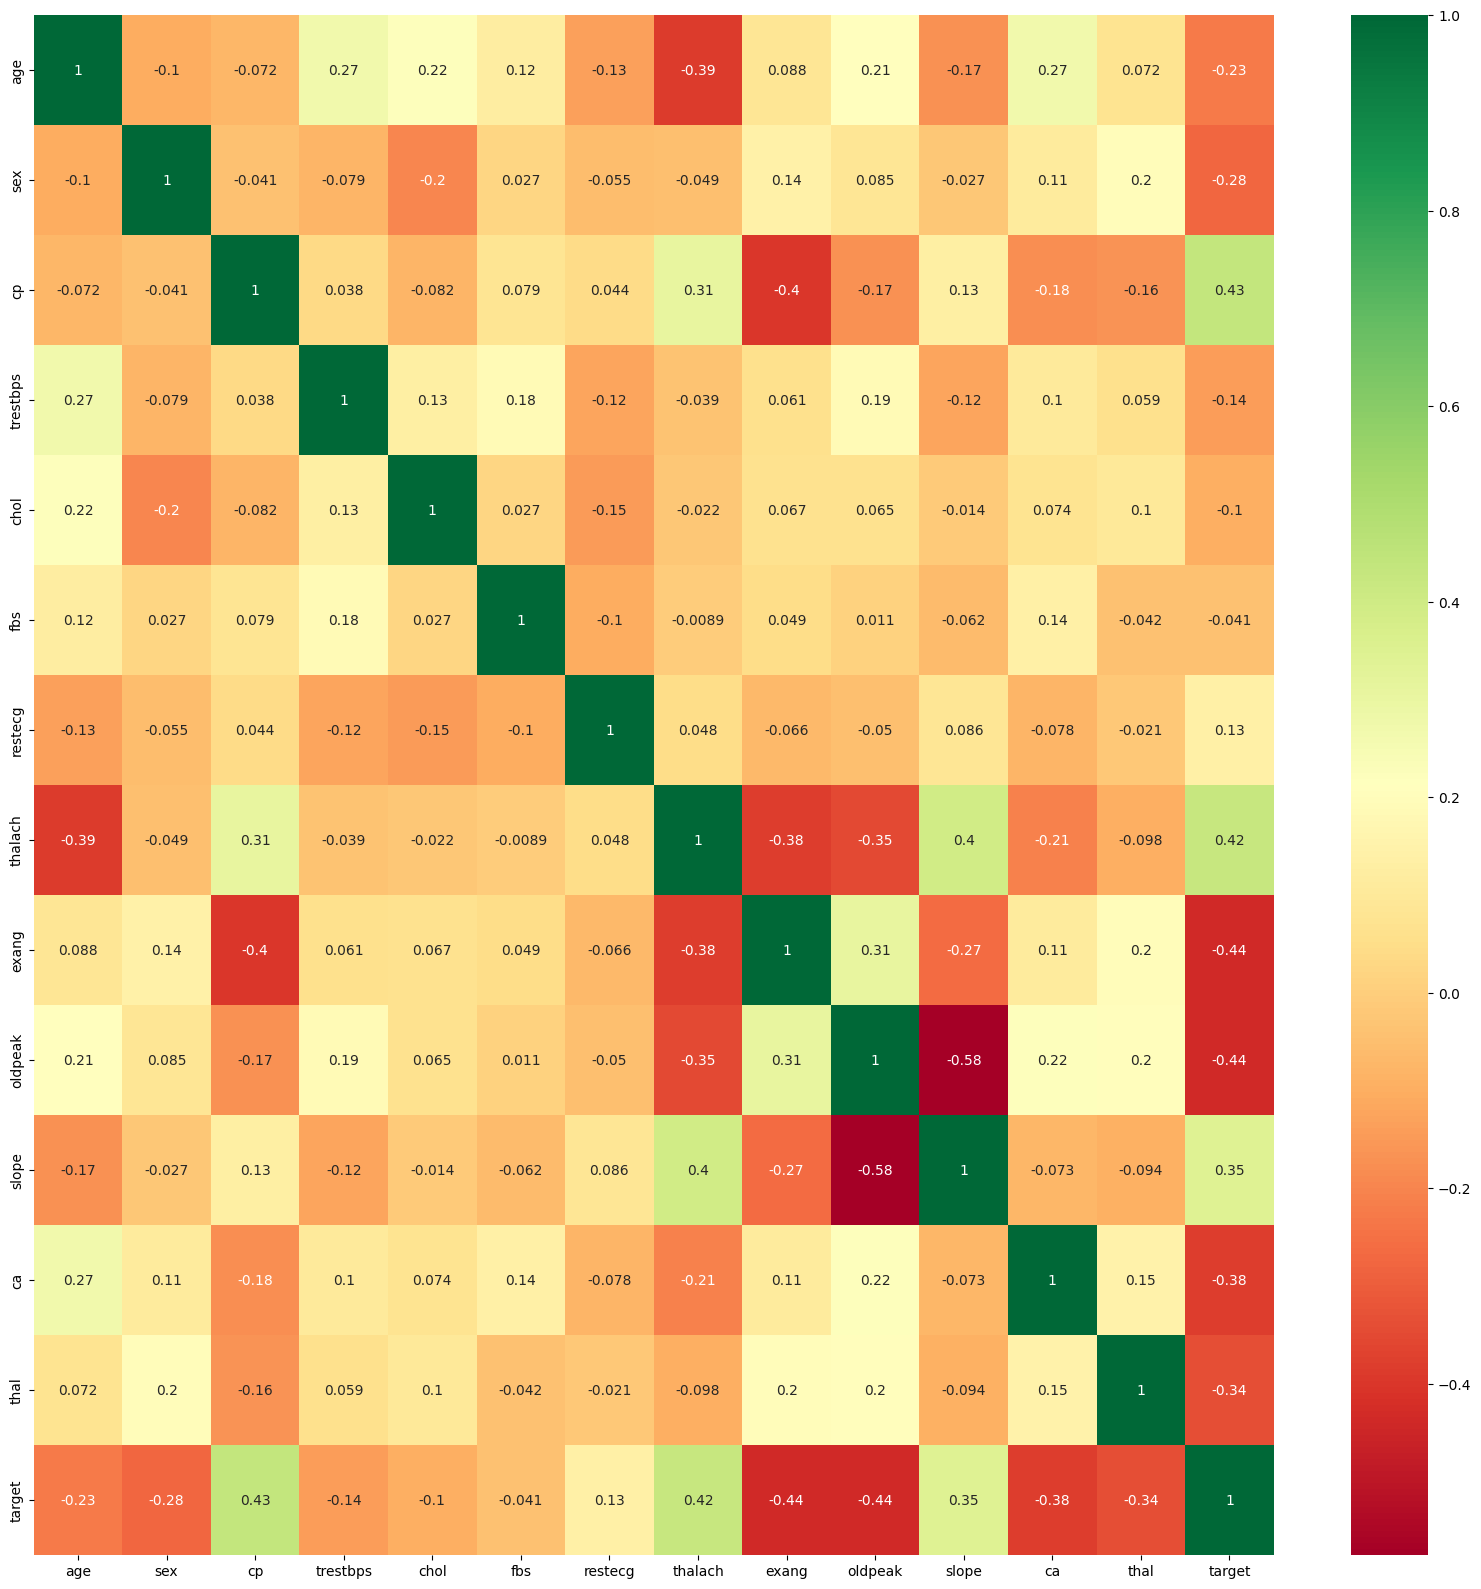

In [11]:
corrmat=df.corr()
features_corr=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[features_corr].corr(),annot=True,cmap='RdYlGn')

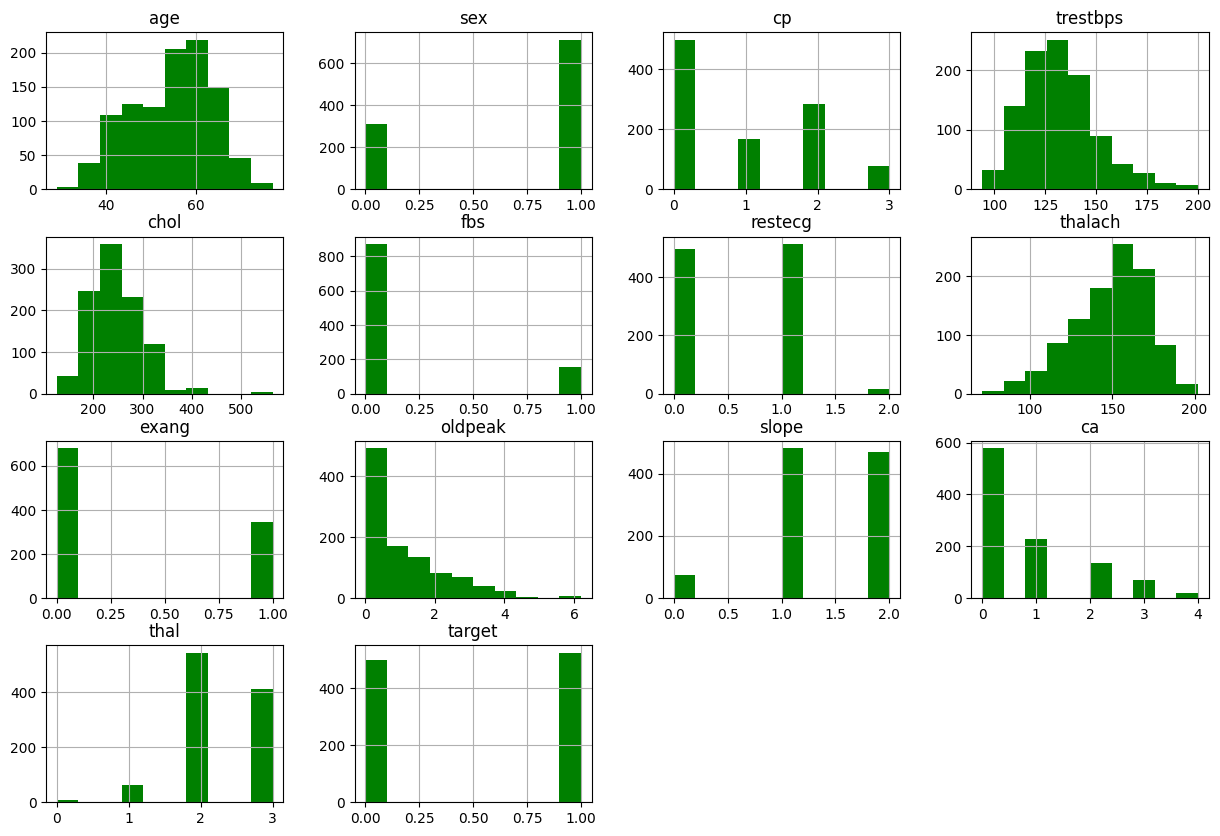

In [13]:
df.hist(bins=10,figsize=(15,10),color='green')
plt.show()

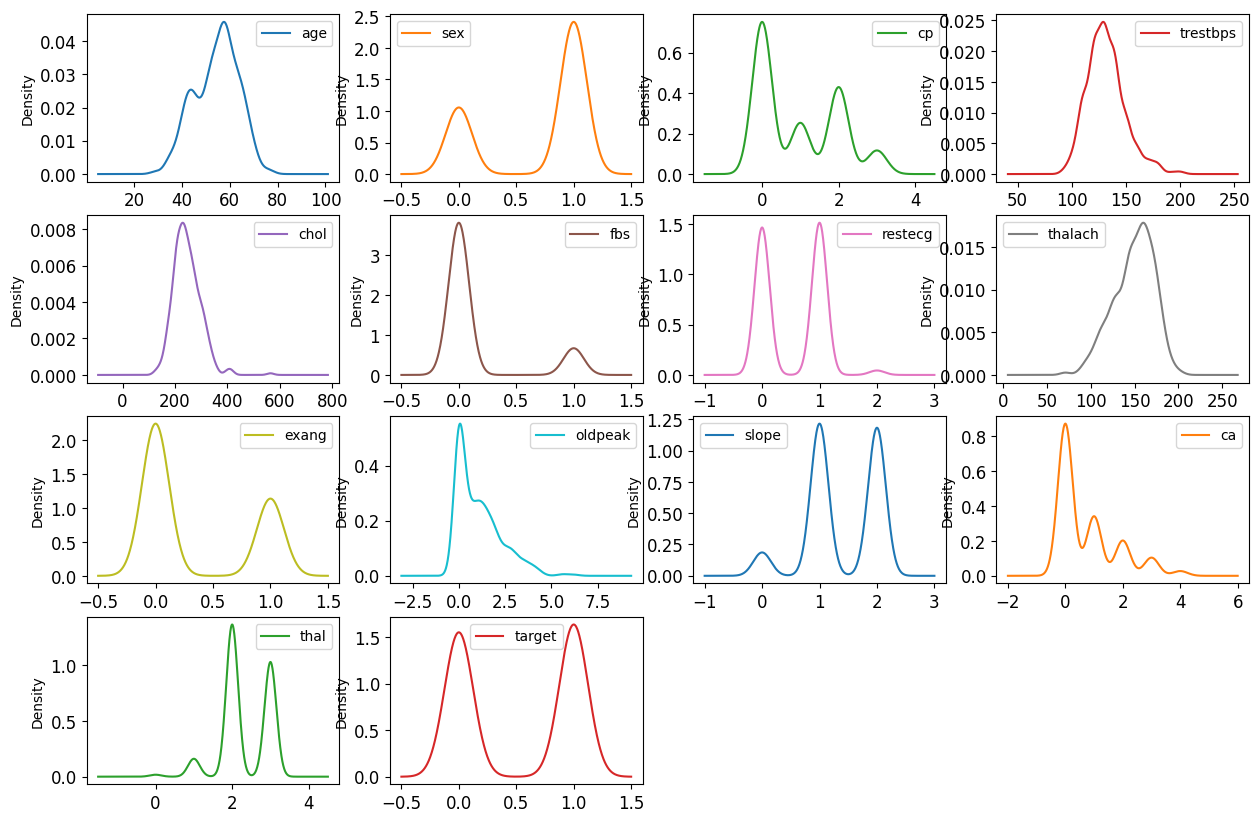

In [14]:
plt=df.plot(kind='density',subplots=True,layout=(4,4), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

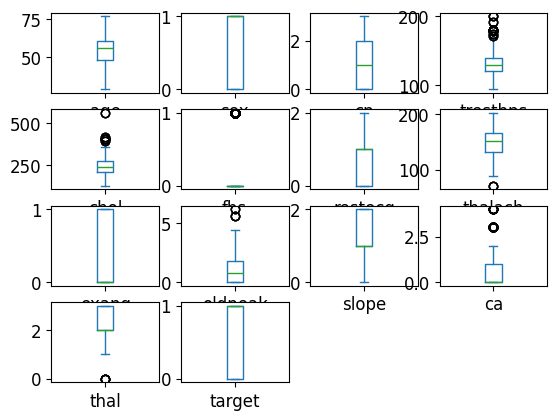

In [15]:
plt=df.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)

<Axes: xlabel='target', ylabel='count'>

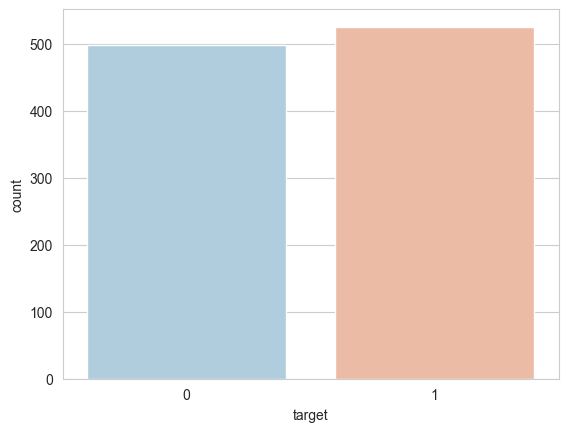

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [17]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [18]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [19]:
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [20]:
X=dataset.drop(['target'],axis=1)
y=dataset['target']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=45)


In [22]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
DT.score(X_test,y_test)


0.9902597402597403

In [24]:
preducation=DT.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test,preducation)
precision = precision_score(y_test,preducation)
recall = recall_score(y_test,preducation)
f1 = f1_score(y_test,preducation)
print("DecisionTreeClassifier Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

DecisionTreeClassifier Model Results:
Accuracy: 0.9902597402597403
Precision: 1.0
Recall: 0.9818181818181818
F1 Score: 0.9908256880733946


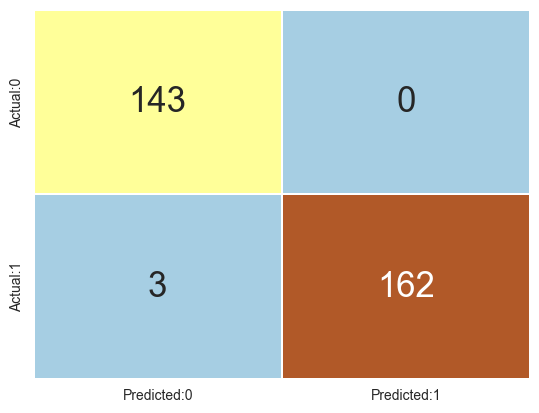

In [29]:
cm = confusion_matrix(y_test, preducation)

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size':25})

plt.show()

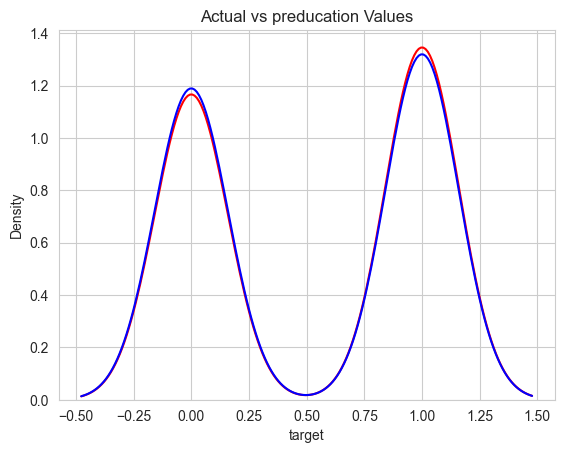

In [30]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(preducation,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()


In [31]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
rfc.score(X_test,y_test)


1.0

In [33]:
preducation=rfc.predict(X_test)


In [34]:
accuracy = accuracy_score(y_test,preducation)
precision = precision_score(y_test,preducation)
recall = recall_score(y_test,preducation)
f1 = f1_score(y_test,preducation)
print("RandomForestClassifier Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

RandomForestClassifier Model Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


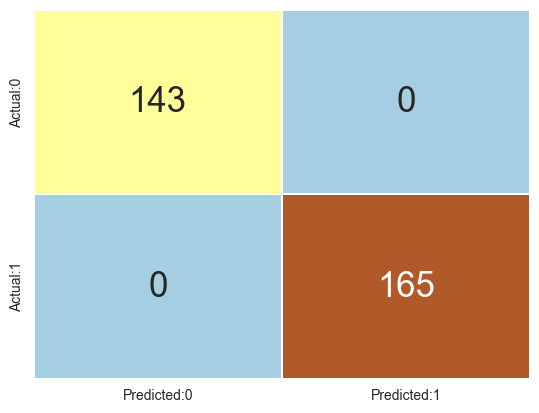

In [35]:
cm=confusion_matrix(y_test,preducation)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

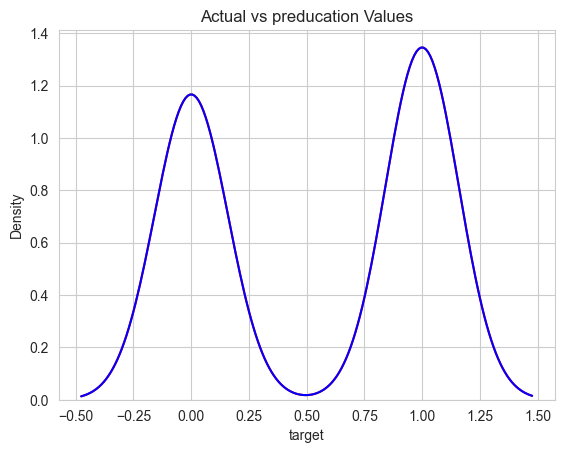

In [36]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(preducation,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

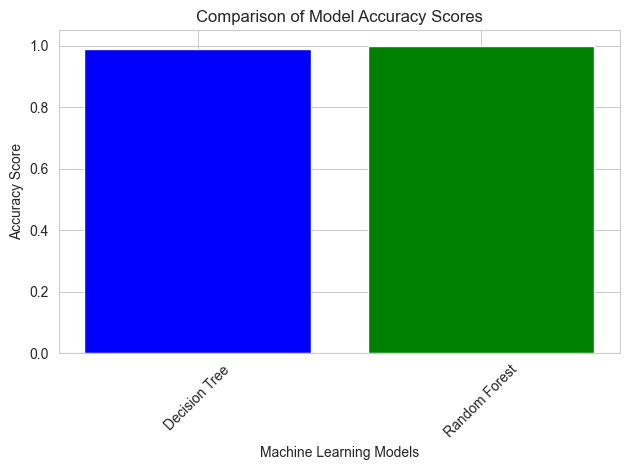

In [39]:
model_names = ['Decision Tree', 'Random Forest']
accuracy_scores = [0.99,1.0]
colors = [ 'blue','green']
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()



